In [2]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

# Load your dataset
df_alz = pd.read_csv("alzheimers_disease_data.csv")

# Drop the 'DoctorIncharge' column
df_alz = df_alz.drop(["DoctorInCharge", "PatientID"], axis=1)  # Pass column names as a list

# Verify the column has been removed
df_alz.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

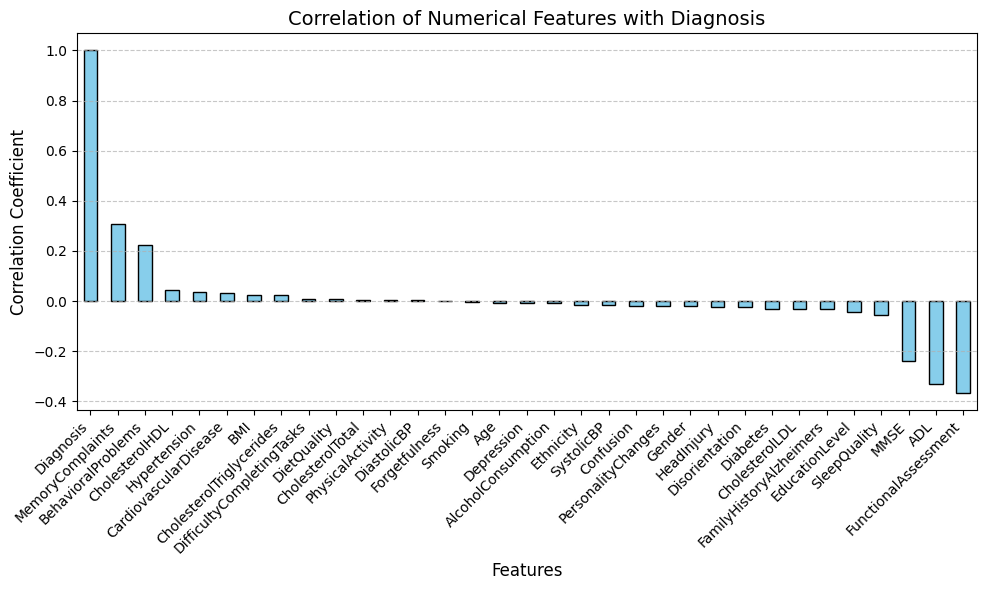

In [6]:
#Correlation (For Numerical Features)
#For numerical features and a categorical label (like diagnosis),
#calculate the correlation or use statistical tests like ANOVA.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_alz is your DataFrame and 'diagnosis' is your label
numerical_features = df_alz.select_dtypes(include=["float64", "int64"]).columns
correlation = df_alz[numerical_features].corrwith(df_alz["Diagnosis"])

# Sort correlations
correlation_sorted = correlation.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlation_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation of Numerical Features with Diagnosis', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

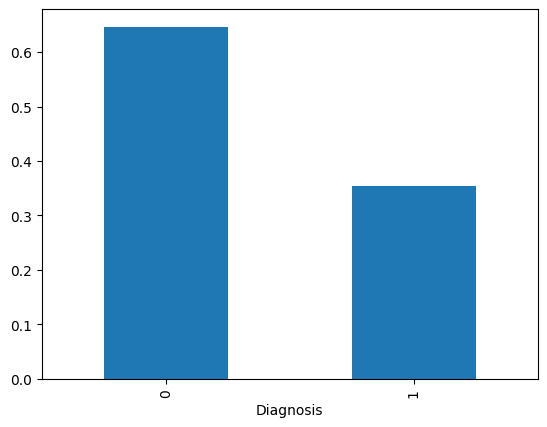

Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64


In [7]:
df_alz['Diagnosis'].value_counts(normalize=True)
# 0=No, 1=Yes

# Check imbalance
df_alz['Diagnosis'].value_counts(normalize=True).plot(kind='bar')
plt.show()

print(df_alz['Diagnosis'].value_counts(normalize=True))

#Focus on diagnosis of having alzheimer, so using undersampling to remove extra no alzheimer row data

In [8]:
#Extract the selected features from dataset
selected_features = [
    'MMSE', 'FunctionalAssessment', 'ADL',
    'MemoryComplaints', 'BehavioralProblems'
]

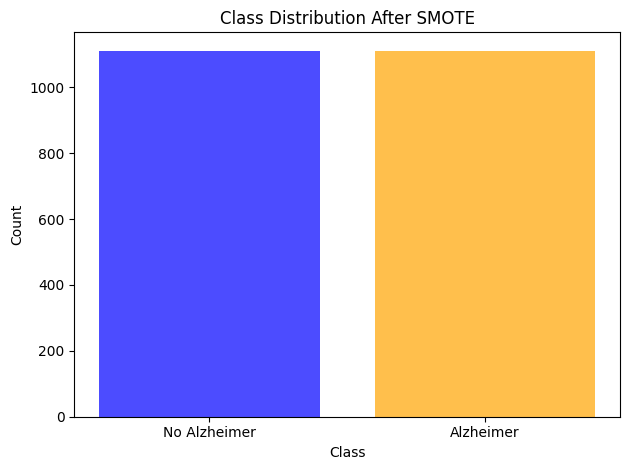

In [9]:
#result on accuracy, precision, f1score decreased means correct classification on alzheimer case REDUCE.
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE  # Import SMOTE here
import pandas as pd

# Define features and target
X = df_alz[selected_features]
y = df_alz['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Plot the class distribution after SMOTE
unique, counts = np.unique(y_train_smote, return_counts=True)
plt.bar(unique, counts, color=['blue', 'orange'], alpha=0.7)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Alzheimer', 'Alzheimer'])
plt.tight_layout()
plt.show()

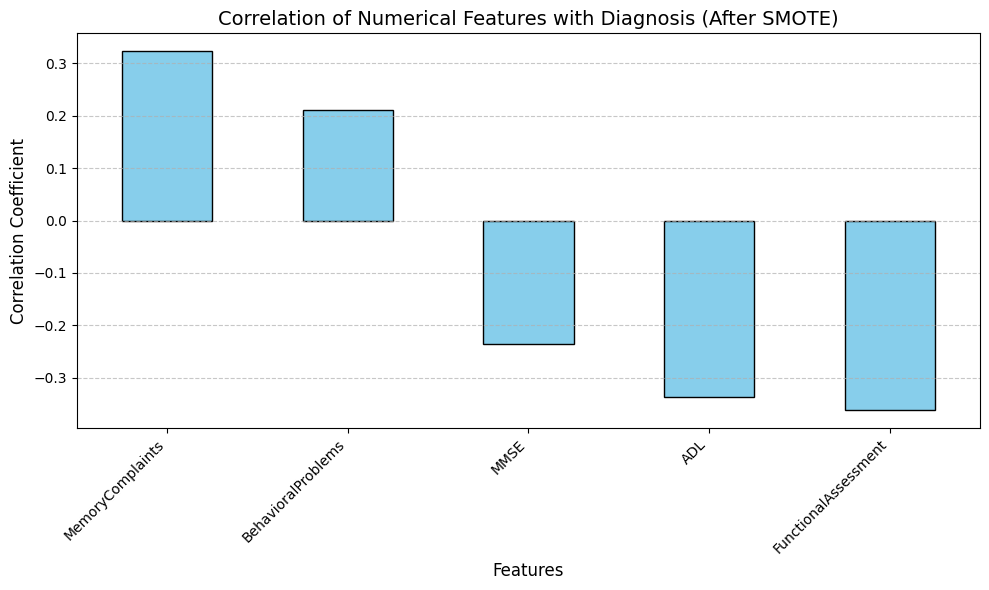

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming you already have X_train_smote and y_train_smote after applying SMOTE

# Combine the resampled features and target into a DataFrame
X_train_df = pd.DataFrame(X_train, columns=selected_features)
y_train_df = pd.Series(y_train, name="Diagnosis")

# Create a combined DataFrame for correlation analysis
df_smote = pd.concat([X_train_df, y_train_df], axis=1)

# Compute the correlation of numerical features with the diagnosis label
numerical_features = X_train_df.columns
correlation = df_smote[numerical_features].corrwith(df_smote["Diagnosis"])

# Sort correlations
correlation_sorted = correlation.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlation_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation of Numerical Features with Diagnosis (After SMOTE)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Accuracy: 0.9441860465116279
Precision: 0.9266666666666666
Recall: 0.9144736842105263
F1-Score: 0.9205298013245033
ROC AUC: 0.9481493752366527


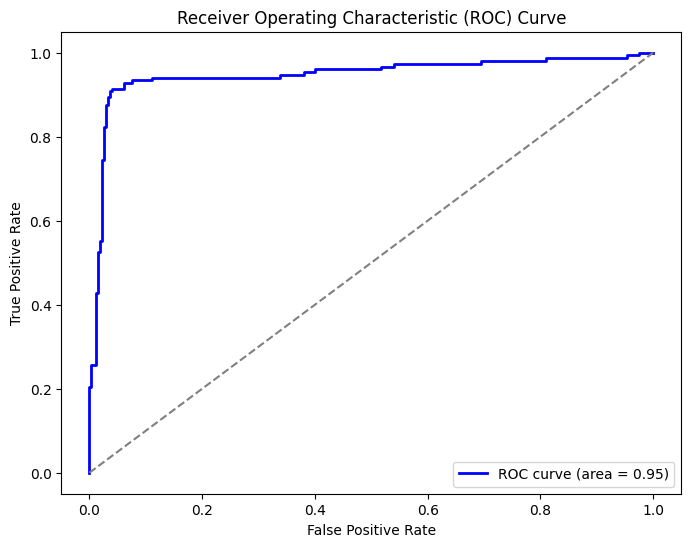

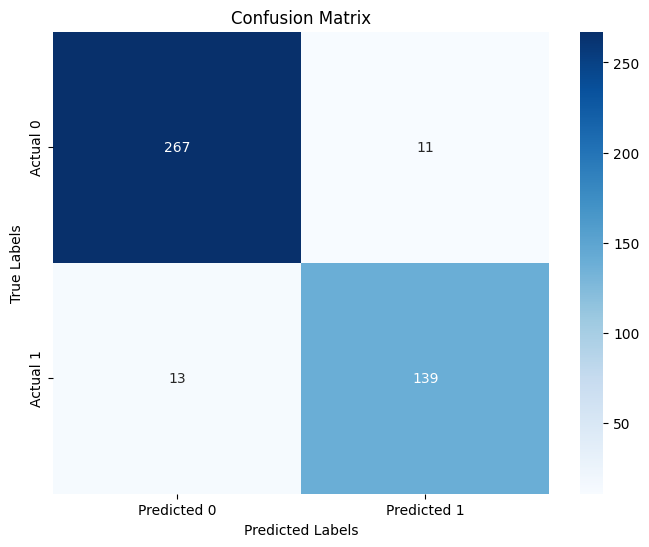

<Figure size 640x480 with 0 Axes>

In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Assuming 'y' is the target variable
#X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42) #Use 0.2 as test because accuracy is higher
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)
#model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

#Accuracy: Proportion of correctly classified instances.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#From 0.94 decreased to 0.92 (SMOTE)

#Precision: Proportion of positive predictions that are actually correct.
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
#From 0.9266 decreased to 0.869

#Recall (Sensitivity): Proportion of actual positives that are correctly identified.
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")
#From 0.91 increased to 0.92

#F1-Score: Harmonic mean of Precision and Recall. It's useful when you need a balance between Precision and Recall.
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")
#From 0.92 decreased to 0.894

#ROC Curve and AUC (Area Under the Curve): Measures the performance of a binary classification model at all classification thresholds.
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#Area 0.95 decreased to 0.937

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed

In [12]:
#2. Extract the leaf node indices for each sample in the dataset XGBoost method

# Step 1: Extract the leaf node indices for all samples in the training set
leaf_indices = model.apply(X_train)

# Step 2: Filter the dataset for samples with Alzheimer's (label '1')
alzheimers_indices = np.where(y_train == 1)[0]  # Get indices of samples with Alzheimer's (label 1)

# Step 3: Extract the leaf node indices for only Alzheimer's samples
leaf_indices_alzheimers = leaf_indices[alzheimers_indices]

# Step 4: Print the leaf node indices for the first 5 Alzheimer's samples
print("Leaf node indices for the first 5 Alzheimer's samples:")
print(leaf_indices_alzheimers[:5])

Leaf node indices for the first 5 Alzheimer's samples:
[[ 7.  7. 16. 56. 54. 54. 61. 56. 52. 46. 38. 59. 43. 26. 39. 39. 37. 26.
  33. 34. 40. 30. 27. 38. 36. 37. 31. 36. 32. 32. 24. 27. 22. 43. 25. 40.
  21. 30. 31. 38. 27. 22. 40. 37. 46. 39. 27. 40. 13. 32. 32. 32. 32. 20.
  44. 31. 42. 27. 28. 17. 35. 32. 27. 34. 30. 42. 14. 27.  4. 27. 33. 36.
  23. 28. 28. 27. 24. 32. 25. 20. 24. 36. 17. 22. 28. 34. 35. 35. 35. 28.
  25. 24. 30. 30. 25. 33. 34. 21. 26. 21.]
 [19. 16. 33. 61. 60. 60. 67. 61. 35. 22. 35. 42. 44. 16. 40. 22. 33. 15.
  34. 27. 40. 51. 16.  8. 38. 37.  3. 41. 31. 37. 16. 27. 22. 11. 25. 40.
  25. 30. 38. 38. 34. 22. 11. 35. 18. 14. 30. 13. 13. 31. 19. 21. 32. 15.
  47. 33. 42. 28. 30. 27. 33. 32. 34. 32. 27. 43. 44. 21.  4. 28. 33. 23.
  24. 23. 27. 29. 25. 32.  5. 20. 23. 33. 15. 22. 11. 17. 35. 33. 41. 19.
  25. 24. 21. 25. 25. 27. 21.  9. 26. 16.]
 [ 7.  7. 16. 15. 15. 15. 60. 54. 52. 46. 38. 52. 40. 26. 39. 39. 37. 26.
  44. 34. 40. 50. 27. 37. 36. 37. 30. 36. 31.

In [13]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Step 4: Flatten the leaf indices for Alzheimer's samples (shape: (n_samples * n_trees, 1))
leaf_indices_flattened = leaf_indices_alzheimers.reshape(-1, 1)

# Step 5: One-hot encode the leaf indices
encoder = OneHotEncoder(sparse_output=False)
leaf_indices_encoded = encoder.fit_transform(leaf_indices_flattened)

# Step 6: Reshape the one-hot encoded array to match the number of Alzheimer's samples
n_samples_alzheimers = leaf_indices_alzheimers.shape[0]
n_trees = leaf_indices_alzheimers.shape[1]

# Reshape the one-hot encoded array to match (n_samples_alzheimers, n_trees * n_leaf_categories)
leaf_indices_encoded_reshaped = leaf_indices_encoded.reshape(n_samples_alzheimers, -1)

# Step 7: Ensure you're indexing X_train properly. If X_train is a NumPy array:
X_train_alzheimers = X_train.iloc[alzheimers_indices]  # For Pandas DataFrame, use .iloc to index by row

# Step 8: Concatenate the original features of Alzheimer's samples with the one-hot encoded leaf indices
X_encoded = np.hstack([X_train_alzheimers, leaf_indices_encoded_reshaped])

# Step 9: Print the shape of the encoded dataset
print("Shape of the encoded dataset:", X_encoded.shape)

Shape of the encoded dataset: (608, 8305)


In [14]:
from sklearn.decomposition import PCA
import numpy as np

# Step 1: Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # You can adjust n_components depending on how much variance you want to preserve

# Perform PCA only on the leaf indices (not the entire feature set)
leaf_indices_pca = pca.fit_transform(leaf_indices_encoded_reshaped)

# Print the shape of the PCA-reduced leaf indices
print("Shape of the PCA-reduced leaf indices:", leaf_indices_pca.shape)

# Step 2: Concatenate the original features (only Alzheimer's samples) with the PCA-reduced leaf indices
# Make sure you're using the Alzheimer's samples from X_train, not the full X_train dataset
# Ensure that you are using iloc for row indexing in a DataFrame
X_train_alzheimers = X_train.iloc[alzheimers_indices]  # Use .iloc[] to index by row for a DataFrame

# Concatenate the features and PCA-reduced leaf indices
X_encoded_reduced = np.hstack([X_train_alzheimers, leaf_indices_pca])

# Print the shape of the encoded and reduced dataset
print("Shape of the encoded and reduced dataset:", X_encoded_reduced.shape)


Shape of the PCA-reduced leaf indices: (608, 2)
Shape of the encoded and reduced dataset: (608, 7)


In [16]:
from scipy.stats import zscore

In [19]:
pip install kmodes

Number of outliers removed: 0
Silhouette Score (gamma=0.5): 0.2510276211103135
Silhouette Score (gamma=1): 0.2510276211103135
Silhouette Score (gamma=2): 0.24859658053325004


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


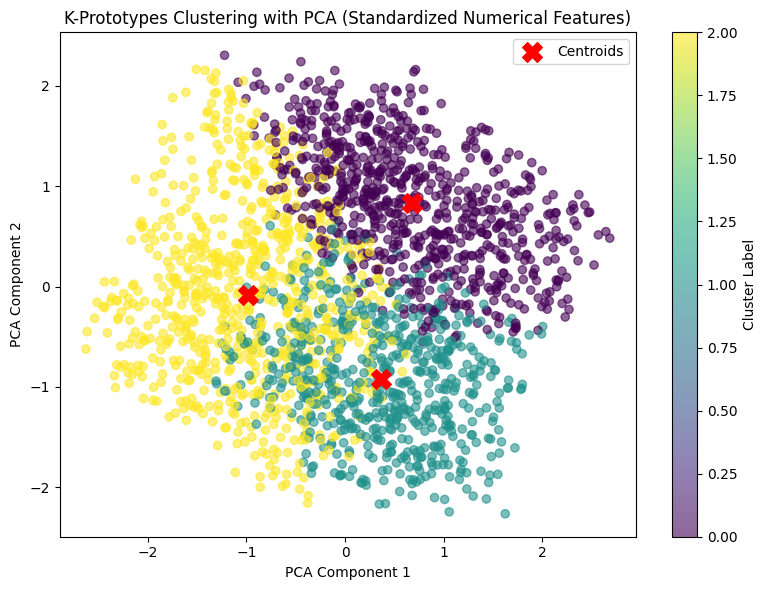

Cluster Centers (Prototypes):
        MMSE  FunctionalAssessment       ADL  MemoryComplaints  \
0  23.217807              6.316860  5.284816               0.0   
1   7.165558              7.214082  5.607848               0.0   
2  12.468410              2.101964  4.171293               0.0   

   BehavioralProblems  Cluster  
0                 0.0        0  
1                 0.0        1  
2                 0.0        2  


In [21]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Step 1: Load your dataset (replace with your actual dataset)
# Example:
df_alz = pd.read_csv("alzheimers_disease_data.csv")

# Drop the 'DoctorIncharge' and 'PatientID' columns
df_alz = df_alz.drop(["DoctorInCharge", "PatientID"], axis=1)

# Step 2: Define selected features
selected_features = [
    'MMSE', 'FunctionalAssessment', 'ADL',  # Numerical
    'MemoryComplaints', 'BehavioralProblems'  # Categorical
]

# Extract the selected features
X_train = df_alz[selected_features]

# Step 3: Identify categorical columns
categorical_cols = [3, 4]  # Indices of 'MemoryComplaints' and 'BehavioralProblems' in selected_features
numerical_cols = [0, 1, 2]  # Indices of 'MMSE', 'FunctionalAssessment', 'ADL' in selected_features


# Step 4: Remove outliers using Z-score (for numerical features only)
# Calculate Z-scores for numerical features
z_scores = np.abs(zscore(X_train.iloc[:, numerical_cols]))

# Define a threshold for outlier detection (e.g., Z-score > 3)
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]

# Remove outliers from the dataset
X_train_cleaned = X_train.drop(X_train.index[outlier_indices]).reset_index(drop=True)

# Print the number of outliers removed
print(f"Number of outliers removed: {len(outlier_indices)}")

# Step 5: Standardize numerical features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = X_train_cleaned.copy()
numerical_cols = [0, 1, 2]  # Indices of 'MMSE', 'FunctionalAssessment', 'ADL' in selected_features
X_train_scaled.iloc[:, numerical_cols] = scaler.fit_transform(X_train_cleaned.iloc[:, numerical_cols])

# Step 6: Convert the dataset to a NumPy array for K-Prototypes
X_train_array = X_train_scaled.to_numpy()

# Step 7: Apply K-Prototypes
for gamma in [0.5, 1, 2]:
    kproto = KPrototypes(n_clusters=3, init='Cao', verbose=0, gamma=gamma,  n_init=10)
    clusters = kproto.fit_predict(X_train_array, categorical=categorical_cols)
    score = silhouette_score(X_train_scaled.iloc[:, numerical_cols], clusters)
    print(f"Silhouette Score (gamma={gamma}): {score}")

# Step 8: Visualize the clusters using PCA (for numerical features only)
# Apply PCA to reduce numerical features to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled.iloc[:, numerical_cols])

# Create a DataFrame for visualization
clustered_data = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
clustered_data['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(clustered_data['PCA1'], clustered_data['PCA2'], c=clustered_data['Cluster'], cmap='viridis', alpha=0.6, marker='o')

# Add cluster centroids to the plot (transform centroids to 2D using PCA)
centroids_pca = pca.transform(kproto.cluster_centroids_[:, numerical_cols])
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label="Centroids")

# Add labels, title, and color bar
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Prototypes Clustering with PCA (Standardized Numerical Features)')
plt.legend()
plt.tight_layout()
plt.show()

# Step 9: Interpret the cluster centers (prototypes)
# Convert cluster centers back to the original scale for numerical features
cluster_centers_original_scale = kproto.cluster_centroids_.copy()
cluster_centers_original_scale[:, numerical_cols] = scaler.inverse_transform(cluster_centers_original_scale[:, numerical_cols])

# Create a DataFrame for the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers_original_scale, columns=selected_features)
cluster_centers_df['Cluster'] = range(kproto.n_clusters)

print("Cluster Centers (Prototypes):")
print(cluster_centers_df)

In [26]:
# Save clustered_data_Kmeans_Scaler to CSV
clustered_data.to_csv('clustered_data_K-Prototype_Scaler.csv', index=False)
print("File 'clustered_data_Kmeans_Scaler.csv' has been saved!")

File 'clustered_data_Kmeans_Scaler.csv' has been saved!


In [24]:
import joblib

# Assuming 'kmeans' is your fitted KMeans model
joblib.dump(kproto, 'alzheimers_model_kprototype.pkl')


['alzheimers_model_kprototype.pkl']